# Homework

---

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*



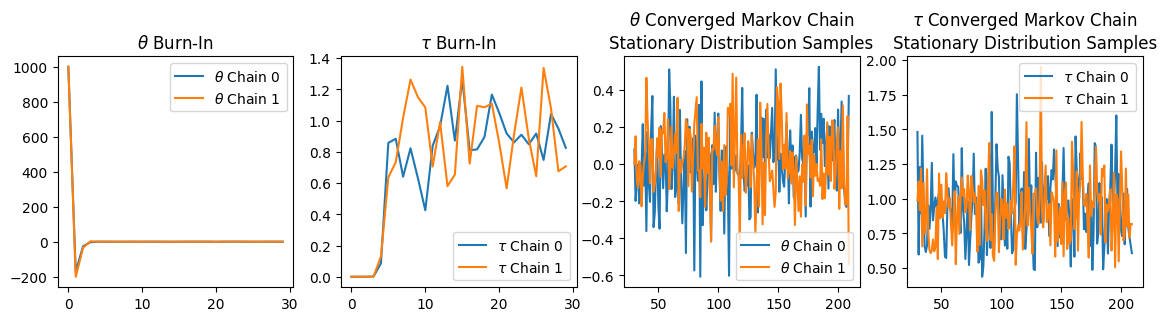

In [5]:
# Q1

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
n = 30; m = 0; s = 1

# Generate Data
x = stats.norm(loc = m, scale = s).rvs(size = n)

# Gibbs Sampling Parameters
C, G = 2, 10000
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000

# Gibbs Sampler
for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a = n/2 + 1,
                    scale = 2 / ((x - theta[c, g - 1]) ** 2).sum()).rvs()

        theta[c, g] = stats.norm(loc = x.mean(),
                   scale = (1 / (tau[c, g] * n) ** 0.5)).rvs()

# Plot Markov Chains
burn = 30
demo = 180

fig, ax = plt.subplots(1, 4, figsize = (14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

for c in range(C):
    ax[0].plot(theta[c, :burn], label=r"$\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label=r"$\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, burn + demo), theta[c, burn:burn + demo], label=r"$\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, burn + demo), tau[c, burn:burn + demo], label=r"$\tau$ Chain " + str(c))

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()
plt.show()

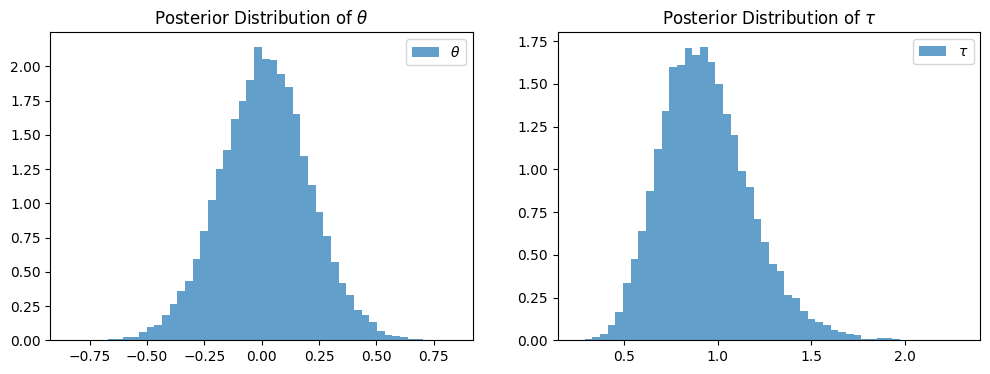

95% Credibility Interval for $\theta$: [-0.37248383  0.40320612]
95% Credibility Interval for $\tau$: [0.53029218 1.46414714]


In [9]:
# Q1 Bayesian Inference
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(theta[:, burn:].flatten(), bins=50, density=True, alpha=0.7, label=r"$\theta$")
ax[1].hist(tau[:, burn:].flatten(), bins=50, density=True, alpha=0.7, label=r"$\tau$")
ax[0].set_title(r"Posterior Distribution of $\theta$")
ax[1].set_title(r"Posterior Distribution of $\tau$")
ax[0].legend()
ax[1].legend()
plt.show()

print(r"95% Credibility Interval for $\theta$:", np.quantile(theta[0, burn:], [0.025, 0.975]))
print(r"95% Credibility Interval for $\tau$:", np.quantile(tau[0, burn:], [0.025, 0.975]))

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$.

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively.

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*

### Q2 Full Conditional Distributions:

Conditional Distribution for $\tau$

$p(\tau|\theta, x)\propto p(x|\tau, \theta)p(\tau)$

$p(x|\theta,\tau)=\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}}e^{-\frac\tau2(x_i-\theta)^2}=\left(\frac\tau{2\pi}\right)^\frac n2e^{-\frac\tau2\sum_{i=1}^n(x_i-\theta)^2}$

$p(\tau)\propto\tau^{\frac\alpha2-1}e^{-\frac\lambda2\tau}$

$\therefore p(\tau|\theta,x)\propto p(x|\tau,\theta)p(\tau)\propto\tau^{\frac\alpha2-1}e^{-\frac\lambda2\tau}\cdot\tau^{\frac n2}e^{-\frac\tau2\sum_{i=1}^n(x_i-\theta)^2}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \propto\tau^{\frac\alpha2+\frac n2-1}e^{-\frac\tau2(\lambda+\sum_{i=1}^n(x_i-\theta)^2)}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sim\text{Gamma}\left(\text{a} = \frac\alpha2 + \frac n2,\ \text{scale} = \frac12(\lambda+\sum_{i=1}^n(x_i-\theta)^2)^{-1}\right)$

Conditional Distribution for $\theta$

$p(\theta|\tau, x)\propto p(x|\theta,\tau)p(\theta)$

$p(x|\theta,\tau)=\prod_{i=1}^n\sqrt{\frac\tau{2\pi}}e^{-\frac\tau2(x_i-\theta)^2}=\left(\frac\tau{2\pi}\right)^{\frac n2}e^{-\frac\tau2\sum_{i=1}^n(x_i-\theta)^2}\propto e^{-\frac\tau2\sum_{i=1}^n(x_i-\theta)^2}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ =e^{-\frac\tau2\left(\sum x_i^2-2\theta\sum x_i+n\theta^2\right)}\propto e^{-\frac\tau2\left(-2\theta\sum x_i+n\theta^2\right)}$

$p(\theta)=\sqrt{\frac{\tau_0}{2\pi}}e^{-\frac{\tau_0}2(\theta-\theta_0)^2}\propto e^{-\frac{\tau_0}2(\theta-\theta_0)^2}\propto e^{-\frac{\tau_0}2(\theta^2-2\theta\theta_0+\theta_0^2)}\propto e^{-\frac{\tau_0}2(\theta^2-2\theta\theta_0)}$

$\therefore p(\theta|x,\tau)\propto e^{-\frac12\left[\theta^2(n\tau+\tau_0)-2\theta(\tau\sum x_i+\tau_0\theta_0)\right]\cdot\frac{n\tau+\tau_0}{n\tau+\tau_0}}\propto e^{-\frac{n\tau+\tau_0}2\left[\theta^2-2\theta\left(\frac{\tau\sum x_i+\tau_0\theta_0}{n\tau+\tau_0}\right)\right]}$

Let $\frac{\tau\sum x_i+\tau_0\theta_0}{n\tau+\tau_0}=\bar\theta$. $p(\theta|x,\tau)\propto e^{-\frac{n\tau+\tau_0}2\left[\theta^2-2\theta\bar\theta+\bar\theta^2\right]}\propto e^{-\frac{n\tau+\tau_0}2(\theta-\bar\theta)^2}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \propto\sqrt{\frac{n\tau+\tau_0}{2\pi}}e^{-\frac{n\tau+\tau_0}2(\theta-\bar\theta)^2}\\\ \ \ \ \ \ \ \ \ \ \ \
\ \ \ \sim N\left(\mu=\frac{\tau\sum x_i+\tau_0\theta_0}{n\tau+\tau_0},\sigma^2=(n\tau+\tau_0)^{-1}\right)$

### Q2 Prior Contribution to Posterior

The $\alpha$ parameter controls the shape of the prior, with a larger $\alpha$ value representing a stronger (more concentrated) prior. The $\lambda$ parameter controls the scale of the prior, meaning that it controls its precision ($\tau$).

From the result above, we have that: $\alpha_{\text{posterior}}=\frac12(\alpha+n)$

For this posterior parameter, we have $n$ data points of contribution from the likelihood and $\alpha$ represents the contribution from the prior.

From the result above, we have that: $\lambda_{\text{posterior}}=\frac12\left[\sum_{i=1}^n(x_i-\theta)^2+\lambda\right]$.

For this posterior parameter, the prior's contribution ($\lambda$) is added to the sum of squared deviations of the $x_i$'s from the mean.

The relative influence of the prior and the likelihood on the posterior depends on their magnitudes: a strong prior occurs with a large $\alpha$ and small $\lambda$. The prior dominates the posterior in this case, shrinking the posterior mean towards the prior mean. Contrarily, a weak prior occurs with a small $\alpha$ and large $\lambda$. The likelihood dominates the posterior, pulling the posterior mean towards the sample mean.



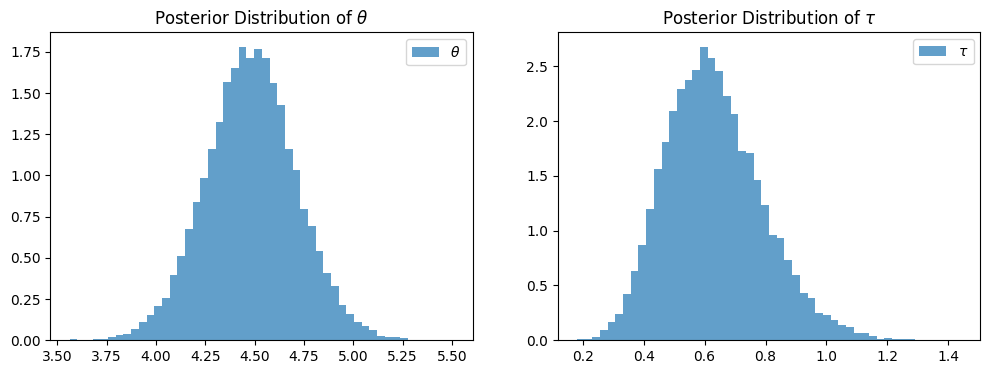

In [2]:
# Q2 Updated Gibbs Sampler

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 30
m = 5
s = 2
theta_0 = 5
tau_0 = 1
alpha = 2
lmbda = 2

x = stats.norm(loc = m, scale = s).rvs(size = n)
C, G = 2, 10000
theta, tau = np.zeros([C, G]), np.zeros([C, G])

theta[:, 0] = np.mean(x)
tau[:, 0] = 1 / s**2

# Gibbs Sampler
for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a = (n + alpha) / 2,
                                scale = 2 / (lmbda + np.sum((x - theta[c, g - 1]) ** 2))).rvs()

        theta[c, g] = stats.norm(loc = (tau[c, g] * np.sum(x) + tau_0 * theta_0) / (n * tau[c, g] + tau_0),
                                 scale = np.sqrt(1 / (n * tau[c, g] + tau_0))).rvs()

# Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(theta[:, 1000:].flatten(), bins=50, density=True, alpha=0.7, label=r"$\theta$")
ax[1].hist(tau[:, 1000:].flatten(), bins=50, density=True, alpha=0.7, label=r"$\tau$")
ax[0].set_title(r"Posterior Distribution of $\theta$")
ax[1].set_title(r"Posterior Distribution of $\tau$")
ax[0].legend()
ax[1].legend()
plt.show()


The hyperparameter values were changed to output different prior distributions, and this can be seen in the plots and code above.

Changing the hyperparameter values effectively changes the effect of the prior and likelihood on the posterior. An example of this would be having a large $\tau_0$ value (high precision), which would result in more influence of the prior mean on the posterior mean.

### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality (if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far for you) is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



### Q3 Answer

(B): If the prior is proper, then the posterior will be proportional to the joint distribution (as given by Bayes' Theorem).

Bayes' Theorem: $p(\theta|x)=\frac{p(x|\theta)p(\theta)}{p(x)}$

Here, $p(x)$ represents evidence, or the marginal distribution of x. This term is constant with respect to $\theta$, and therefore the posterior $p(\theta|x)$ is proportional to the joint (product of likelihood and prior). $p(\theta|x)\propto p(x|\theta)p(\theta)$.

### Exact Distribution

To determine the exact posterior distribution, the functional form of the joint likelihood (proportional to the posterior) needs to be recognized. In simple cases, the functional form of the joint will be from a common distribution. In cases of conjugate priors, the posterior will be a distribution from the same family as the prior.

Bayesians do not focus on deriving exact posterior distributions. Instead, they rely on sampling methods to generate data from the posterior distribution. This allows for the creation of empirical histograms and thus the calculation of credible intervals and probability statements for parameters. Therefore, the exact distribution of the posterior is not necessary for Bayesian inference.